In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [93]:
df = pd.read_csv("car_data.csv")
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


### Task 1:

In [94]:
X = np.array(df['Mileage']).reshape(-1, 1)
y = df['Price']
model = linear_model.LinearRegression()
model.fit(X, y)

equation_ = f'y = {model.coef_[0]:.2f} x + {model.intercept_:.2f}'
def equation_func(x): return (model.coef_[0]*x) + model.intercept_


equation_


'y = -0.17 x + 24764.56'

Text(270, 215, 'y = -0.17 x + 24764.56')

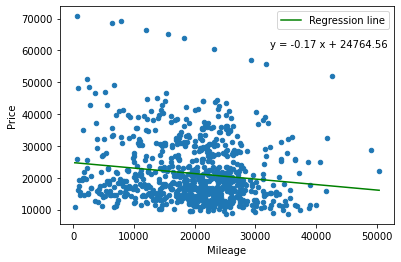

In [95]:
ax = df.plot(kind='scatter', x='Mileage', y='Price')
x1, x2 = df['Mileage'].min(), df['Mileage'].max()
pd.DataFrame([equation_func(x1), equation_func(x2)], index=[x1, x2])\
    .plot(kind='line', ax=ax, color='green')
ax.legend(['Regression line'])
ax.annotate(equation_, (270, 215), xycoords='figure points')


In [96]:
score = model.score(X, y)
isGoodFit = score>=0.8
print(f'The equation is{" " if isGoodFit else " not "}a good fit . R² = {score:.3f}')

The equation is not a good fit . R² = 0.020


# Task 2:

In [97]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


***Dropping object columns***

In [98]:
df_ = df.select_dtypes(exclude=['object'])
df_.head()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,6,3.1,4,1,1,1
1,17542.036083,9135,6,3.1,4,1,1,0
2,16218.847862,13196,6,3.1,4,1,1,0
3,16336.913140,16342,6,3.1,4,1,0,0
4,16339.170324,19832,6,3.1,4,1,0,1


In [99]:
model = linear_model.LinearRegression()
X = df_.drop('Price', axis=1)
y = df_['Price']
model.fit(X, y)


def coeffs(
    arr): return ' + '.join([f'{x:.2f} x{i}' for i, x in enumerate(arr)])


equation_ = f'y = {coeffs(model.coef_)} + {model.intercept_:.2f}'
equation_


'y = -0.17 x0 + 3792.38 x1 + -787.22 x2 + -1542.75 x3 + 6289.00 x4 + -1993.80 x5 + 3349.36 x6 + 6758.76'

In [100]:
score = model.score(X, y)
isGoodFit = score>=0.8
print(f'The equation is{" " if isGoodFit else " not "}a good fit . R² = {score:.3f}')

The equation is not a good fit . R² = 0.446


In [101]:
df_corr = df_.corr()[['Price']]
df_corr.reset_index(inplace=True)
df_corr


,index,Price
0,Price,1.000000
1,Mileage,-0.143051
2,Cylinder,0.569086
3,Liter,0.558146
4,Doors,-0.138750
5,Cruise,0.430851
6,Sound,-0.124348
7,Leather,0.157197


In [102]:
best_features = df_corr[df_corr['Price'].abs() > 0.2]['index'].to_list()
best_features.remove('Price')
best_features


['Cylinder', 'Liter', 'Cruise']

### Task 3:

In [103]:
df_ = df.select_dtypes(include=['object'])
df_.head()

,Make,Model,Trim,Type
0,Buick,Century,Sedan 4D,Sedan
1,Buick,Century,Sedan 4D,Sedan
2,Buick,Century,Sedan 4D,Sedan
3,Buick,Century,Sedan 4D,Sedan
4,Buick,Century,Sedan 4D,Sedan


In [104]:
cardinality = df_.apply(lambda col: len(col.unique()) )
high_cardinality = cardinality[cardinality > 8]
high_cardinality.index

Index(['Model', 'Trim'], dtype='object')

***Model and Trim have high cardinality***\
\
*Options:*
1. Label encode based on frequency
1. <span style="color:green">Label encode based on mean price of sub-group</span>
1. Drop column

<span style="color:green">I will select the second option</span> 

***Type & Make columns has low cardinality so it will be one hot encoded***

In [105]:
model_dict = df.groupby(['Model'])['Price'].mean()\
    .rank(method='max').astype(np.int16).to_dict()
trim_dict = df.groupby(['Trim'])['Price'].mean()\
    .rank(method='max').astype(np.int16).to_dict()

In [106]:
df_ = df[:]
df_['Model'] = df_['Model'].replace(model_dict)
df_['Trim'] = df_['Trim'].replace(trim_dict)
df_.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,9,30,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,9,30,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,9,30,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,9,30,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,9,30,Sedan,6,3.1,4,1,0,1


In [107]:
df_ = df_.drop('Make', axis=1).join(pd.get_dummies(df['Make'], prefix='Make') )
df_ = df_.drop('Type', axis=1).join(pd.get_dummies(df['Type'], prefix='Type') )
df_.head()

,Price,Mileage,Model,Trim,Cylinder,Liter,Doors,Cruise,Sound,Leather,...,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,17314.103129,8221,9,30,6,3.1,4,1,1,1,...,0,0,0,0,0,0,0,0,1,0
1,17542.036083,9135,9,30,6,3.1,4,1,1,0,...,0,0,0,0,0,0,0,0,1,0
2,16218.847862,13196,9,30,6,3.1,4,1,1,0,...,0,0,0,0,0,0,0,0,1,0
3,16336.913140,16342,9,30,6,3.1,4,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,16339.170324,19832,9,30,6,3.1,4,1,0,1,...,0,0,0,0,0,0,0,0,1,0


In [108]:
df_.select_dtypes(['object', 'string']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Empty DataFrame

***All object columns are converted to numeric values***

In [109]:
df_corr = df_.corr()[['Price']]
df_corr.reset_index(inplace=True)
df_corr


,index,Price
0,Price,1.000000
1,Mileage,-0.143051
2,Model,0.907700
3,Trim,0.692677
4,Cylinder,0.569086
5,Liter,0.558146
6,Doors,-0.138750
7,Cruise,0.430851
8,Sound,-0.124348
9,Leather,0.157197


In [110]:

best_features = df_corr[df_corr['Price'].abs() > 0.2]['index'].to_list()
best_features.remove('Price')
best_features


['Model',
 'Trim',
 'Cylinder',
 'Liter',
 'Cruise',
 'Make_Cadillac',
 'Make_Chevrolet',
 'Make_SAAB',
 'Make_Saturn',
 'Type_Convertible',
 'Type_Hatchback']

In [111]:
model = linear_model.LinearRegression()
X = df_.drop('Price', axis=1)
y = df_['Price']
model.fit(X, y)


def coeffs(
    arr): return ' + '.join([f'{x:.2f} x{i}' for i, x in enumerate(arr)])


equation_ = f'y = {coeffs(model.coef_)} + {model.intercept_:.2f}'
print(equation_)
score = model.score(X, y)
isGoodFit = score>=0.8
print(f'The equation is{" " if isGoodFit else " not "}a good fit . R² = {score:.3f}')


y = -0.18 x0 + 438.33 x1 + 12.34 x2 + -1110.94 x3 + 3295.61 x4 + -1907.67 x5 + -177.33 x6 + 369.55 x7 + 448.69 x8 + -2461.37 x9 + 9447.78 x10 + -3111.77 x11 + -3384.34 x12 + 1720.94 x13 + -2211.24 x14 + 5595.73 x15 + -4641.90 x16 + -1062.81 x17 + -1566.65 x18 + 1675.62 x19 + 23180.47
The equation is a good fit . R² = 0.946


<span style="color:green">***We have an equation with good fit ; R² = 0.946***</span>